In [1]:
library("party")
library("partykit")

Loading required package: grid
Loading required package: mvtnorm
Loading required package: modeltools
Loading required package: stats4
Loading required package: strucchange
Loading required package: zoo

Attaching package: 'zoo'

The following objects are masked from 'package:base':

    as.Date, as.Date.numeric

Loading required package: sandwich
Loading required package: libcoin

Attaching package: 'partykit'

The following objects are masked from 'package:party':

    cforest, ctree, ctree_control, edge_simple, mob, mob_control,
    node_barplot, node_bivplot, node_boxplot, node_inner, node_surv,
    node_terminal, varimp



In [2]:
#ctree()
iris_ctree <- ctree(Species ~ Sepal.Length + Sepal.Width + Petal.Length + Petal.Width, data=iris)
print(iris_ctree)


Model formula:
Species ~ Sepal.Length + Sepal.Width + Petal.Length + Petal.Width

Fitted party:
[1] root
|   [2] Petal.Length <= 1.9: setosa (n = 50, err = 0.0%)
|   [3] Petal.Length > 1.9
|   |   [4] Petal.Width <= 1.7
|   |   |   [5] Petal.Length <= 4.8: versicolor (n = 46, err = 2.2%)
|   |   |   [6] Petal.Length > 4.8: versicolor (n = 8, err = 50.0%)
|   |   [7] Petal.Width > 1.7: virginica (n = 46, err = 2.2%)

Number of inner nodes:    3
Number of terminal nodes: 4


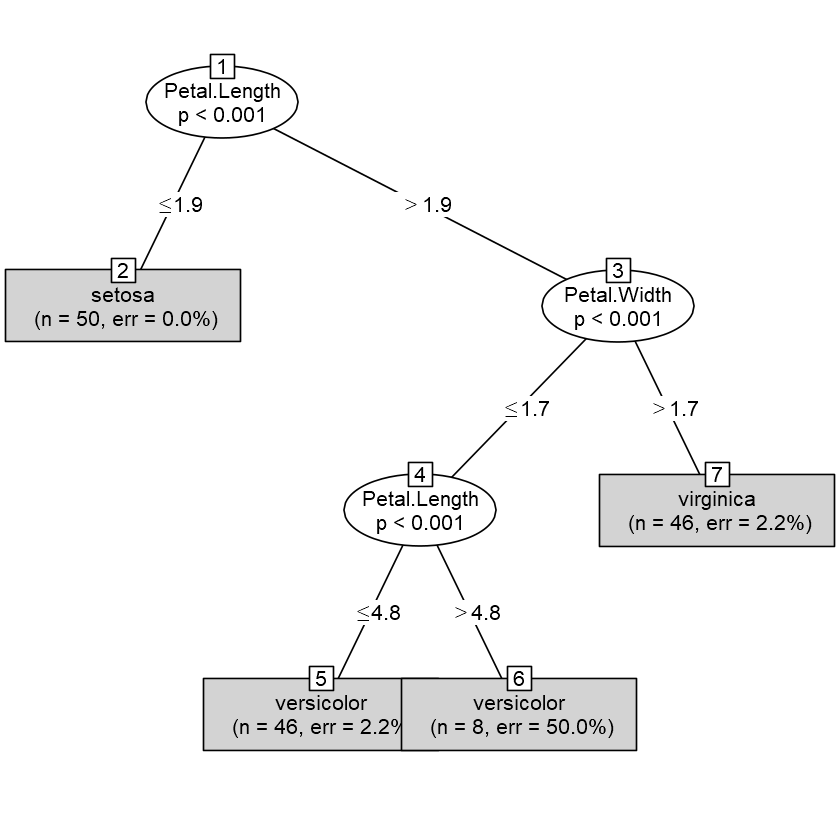

In [3]:
plot(as.simpleparty(iris_ctree), type="simple")

In [4]:
#PL > 1.9 & PW > 1.7 = Virginica

#PL < 1.9 , = Setosa



In [5]:
data <- read.csv("C:\\Users\\hp\\Downloads\\cerealspga05.csv", header = TRUE,
                 stringsAsFactors = FALSE,
                 strip.white = TRUE ,
                 sep = ',')

print(str(data))

'data.frame':	74 obs. of  16 variables:
 $ name    : chr  "100%_Bran" "All-Bran" "All-Bran_with_Extra_Fiber" "Cracklin'_Oat_Bran" ...
 $ mfr     : chr  "N" "K" "K" "K" ...
 $ type    : chr  "C" "C" "C" "C" ...
 $ calories: int  70 70 50 110 120 120 120 110 110 110 ...
 $ protein : int  4 4 4 3 3 3 3 2 2 2 ...
 $ fat     : int  1 1 0 3 1 1 5 2 2 0 ...
 $ sodium  : int  130 260 140 140 200 210 15 200 180 125 ...
 $ fiber   : num  10 9 14 4 6 5 2 1 1.5 1 ...
 $ carbo   : num  5 7 8 10 11 14 8 14 10.5 11 ...
 $ sugars  : int  6 5 0 7 14 12 8 8 10 14 ...
 $ potass  : int  280 320 330 160 260 240 135 -1 70 30 ...
 $ vitamins: int  25 25 25 25 25 25 0 25 25 25 ...
 $ shelf   : int  3 3 3 3 3 2 3 3 1 2 ...
 $ weight  : num  1 1 1 1 1.33 1.33 1 1 1 1 ...
 $ cups    : num  0.33 0.33 0.5 0.5 0.67 0.75 1 0.75 0.75 1 ...
 $ rating  : num  68.4 59.4 93.7 40.4 37.8 ...
NULL


In [6]:
df = data[c(-1,-2,-3,-13,-14,-15)]

In [7]:
head(df)

calories,protein,fat,sodium,fiber,carbo,sugars,potass,vitamins,rating
70,4,1,130,10,5,6,280,25,68.40297
70,4,1,260,9,7,5,320,25,59.42551
50,4,0,140,14,8,0,330,25,93.70491
110,3,3,140,4,10,7,160,25,40.44877
120,3,1,200,6,11,14,260,25,37.84059
120,3,1,210,5,14,12,240,25,39.25920


In [8]:
cereals_ctree <- ctree(rating ~ ., data=df)
print(cereals_ctree)


Model formula:
rating ~ calories + protein + fat + sodium + fiber + carbo + 
    sugars + potass + vitamins

Fitted party:
[1] root
|   [2] sugars <= 7
|   |   [3] calories <= 90: 64.429 (n = 13, err = 1588.1)
|   |   [4] calories > 90
|   |   |   [5] sodium <= 140: 50.756 (n = 9, err = 505.4)
|   |   |   [6] sodium > 140
|   |   |   |   [7] protein <= 2: 41.356 (n = 11, err = 101.7)
|   |   |   |   [8] protein > 2: 48.092 (n = 9, err = 183.4)
|   [9] sugars > 7
|   |   [10] protein <= 1: 25.492 (n = 11, err = 284.1)
|   |   [11] protein > 1: 33.834 (n = 21, err = 315.3)

Number of inner nodes:    5
Number of terminal nodes: 6


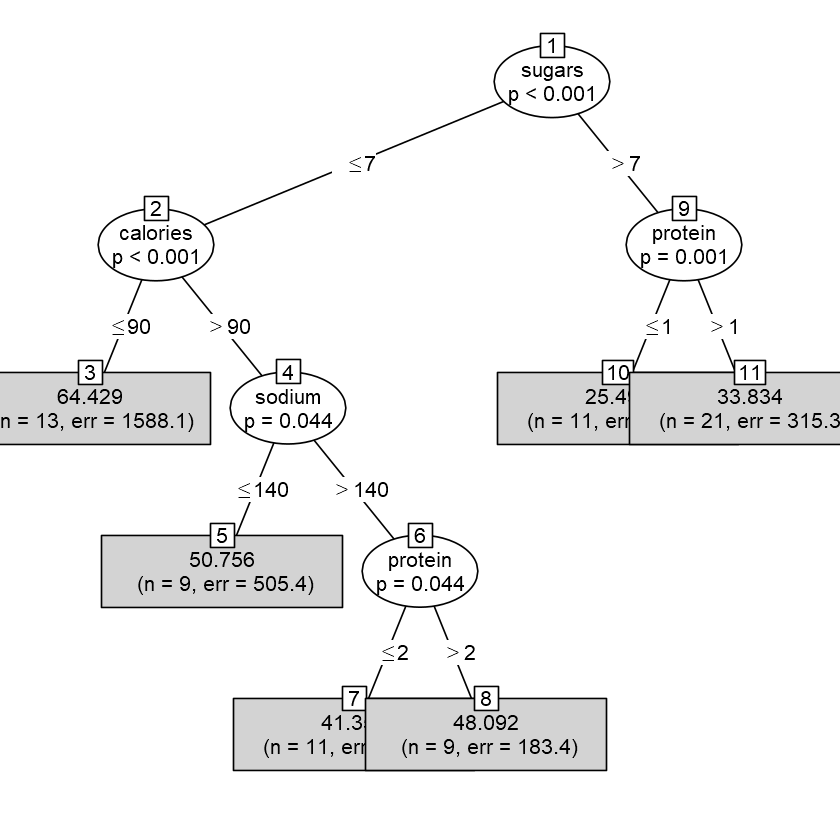

In [9]:
plot(as.simpleparty(cereals_ctree), type="simple")


Classification tree:
tree(formula = Species ~ ., data = iris)
Variables actually used in tree construction:
[1] "Petal.Length" "Petal.Width"  "Sepal.Length"
Number of terminal nodes:  6 
Residual mean deviance:  0.1253 = 18.05 / 144 
Misclassification error rate: 0.02667 = 4 / 150 

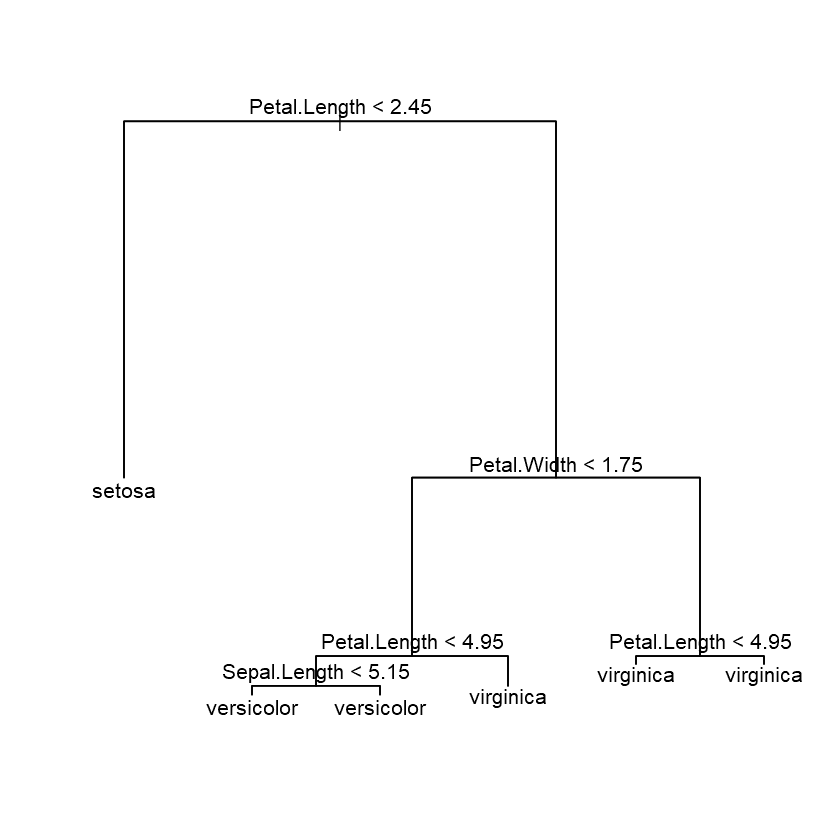

In [15]:
library(tree)
tree1 <- tree(Species ~ ., data = iris)
summary(tree1)
plot(tree1)
text(tree1)


Regression tree:
tree(formula = rating ~ ., data = df)
Variables actually used in tree construction:
[1] "sugars"   "calories" "protein"  "fat"     
Number of terminal nodes:  7 
Residual mean deviance:  31.47 = 2109 / 67 
Distribution of residuals:
     Min.   1st Qu.    Median      Mean   3rd Qu.      Max. 
-11.41000  -3.48700  -0.06966   0.00000   2.54200  21.54000 

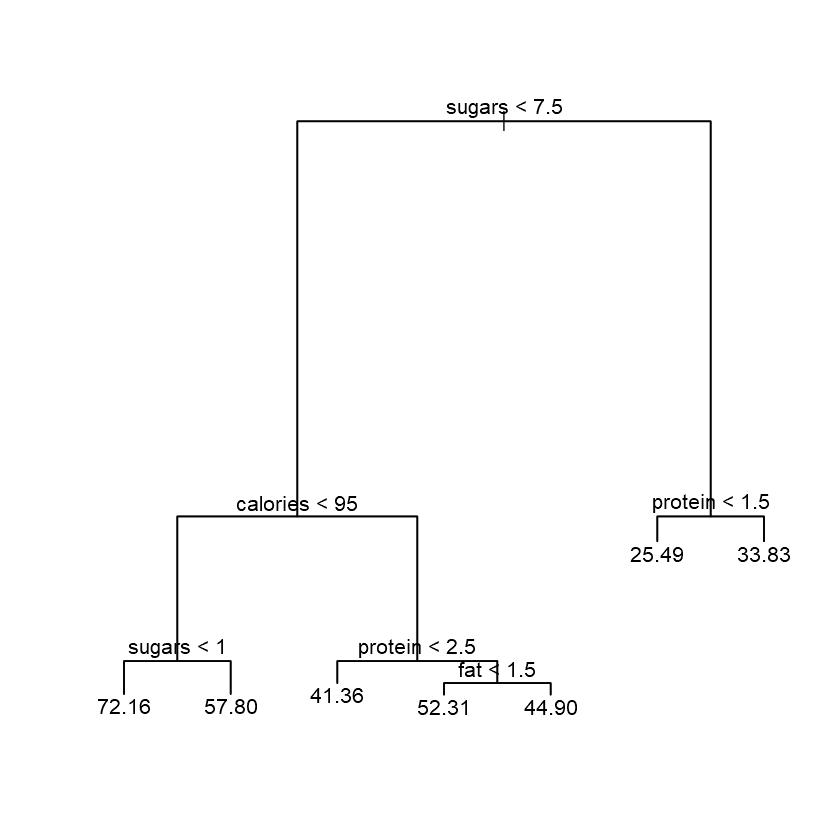

In [16]:
tree1 <- tree(rating ~ ., data = df)
summary(tree1)
plot(tree1)
text(tree1)

Rattle: A free graphical interface for data science with R.
Version 5.2.0 Copyright (c) 2006-2018 Togaware Pty Ltd.
Type 'rattle()' to shake, rattle, and roll your data.


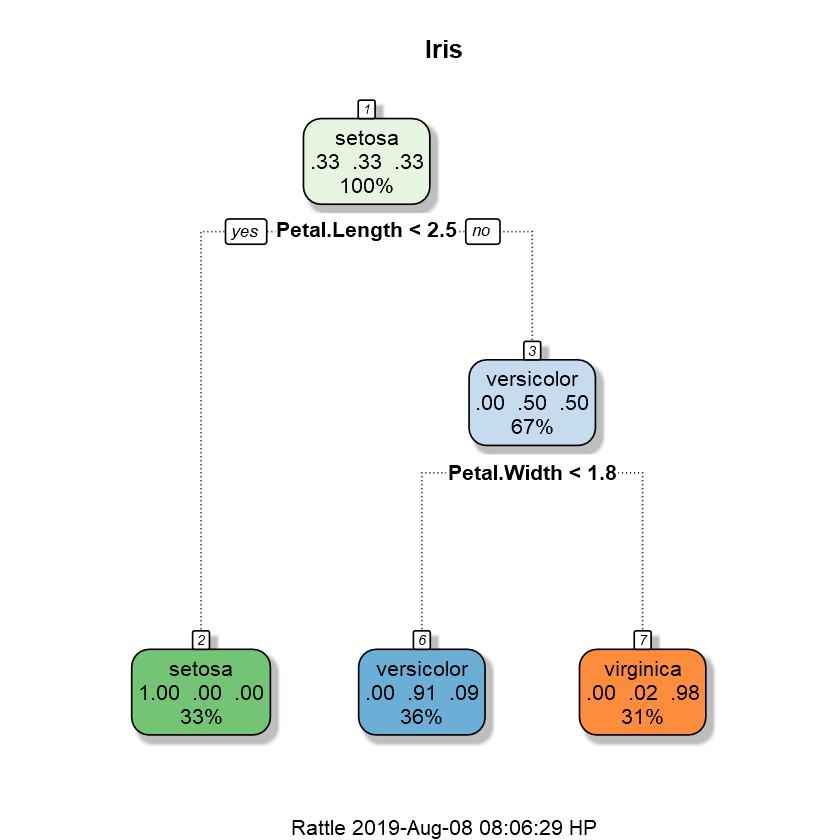

In [17]:
# load libraries
library(rpart)
library(rattle)
 
rpart <- rpart(Species ~ ., data=iris, method="class",)

# plot decision tree
fancyRpartPlot(rpart, main="Iris")

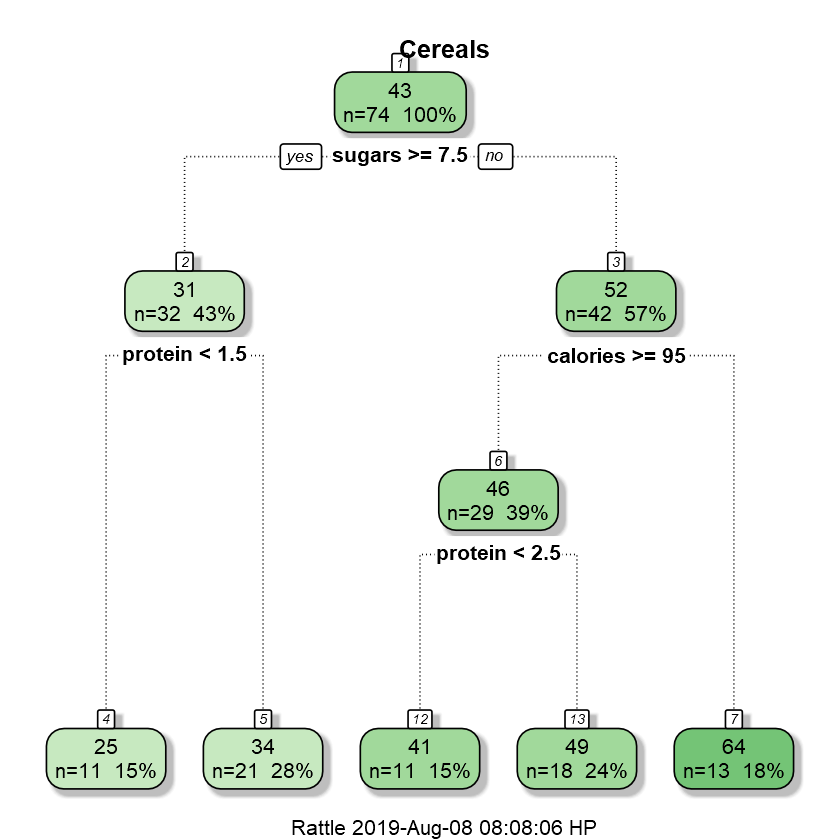

In [21]:
rpart <- rpart(rating ~ ., data=df)

# plot decision tree
fancyRpartPlot(rpart, main="Cereals")

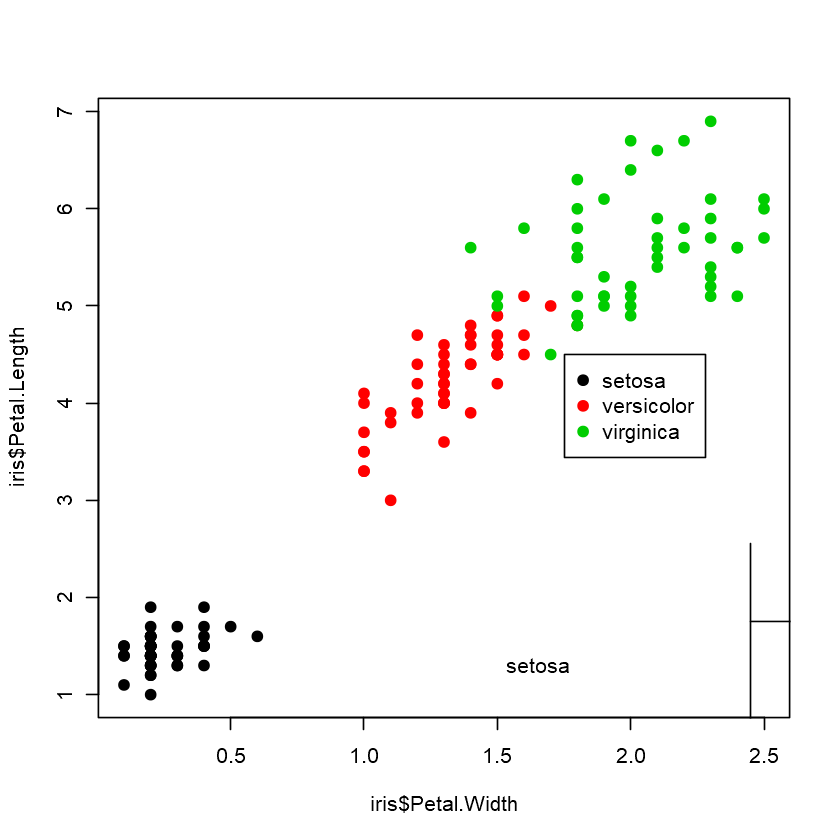

In [25]:
tree1 <- tree( Species ~ Petal.Length + Petal.Width, data = iris)

plot(iris$Petal.Width,iris$Petal.Length,pch=19,col=as.numeric(iris$Species))
partition.tree(tree1,label="Species",add=TRUE)
legend(1.75,4.5,legend=unique(iris$Species),col=unique(as.numeric(iris$Species)),pch=19)

In [27]:
library(randomForest)
set.seed(71) 
rf <- randomForest(rating ~ . ,data=df, ntree=1500) 
print(rf)


Call:
 randomForest(formula = rating ~ ., data = df, ntree = 1500) 
               Type of random forest: regression
                     Number of trees: 1500
No. of variables tried at each split: 3

          Mean of squared residuals: 34.60647
                    % Var explained: 82.8


In [28]:
importance(rf)

,IncNodePurity
calories,3482.0431
protein,885.0739
fat,537.0851
sodium,1230.9329
fiber,1377.6195
carbo,751.4388
sugars,4457.7885
potass,1072.1085
vitamins,497.9679


In [29]:
#  sugars, calories,  fiber,sodium


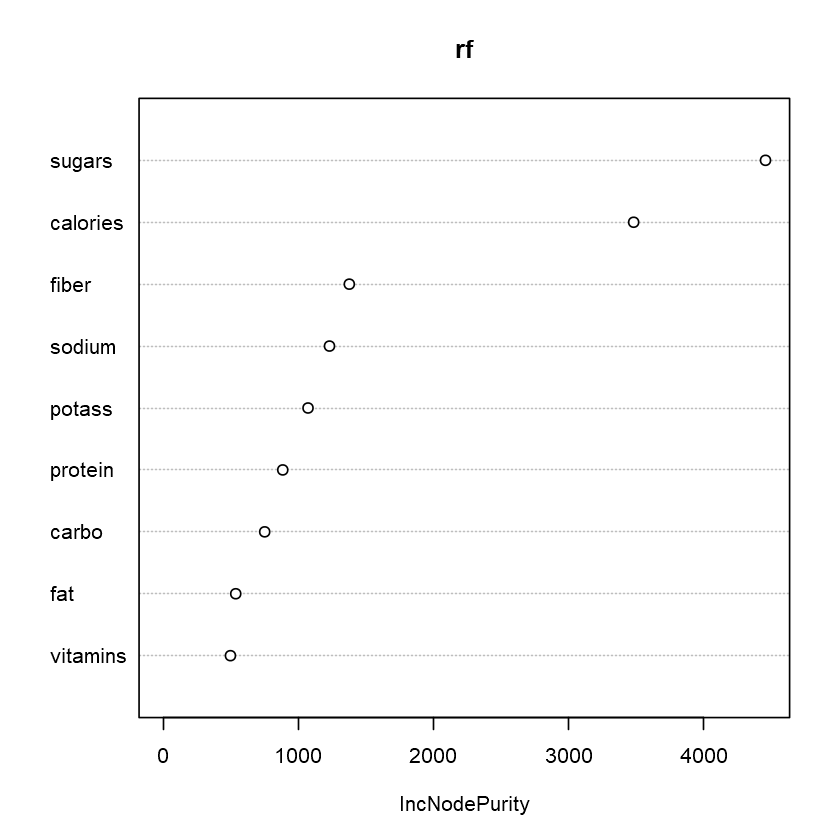

In [30]:
varImpPlot(rf)

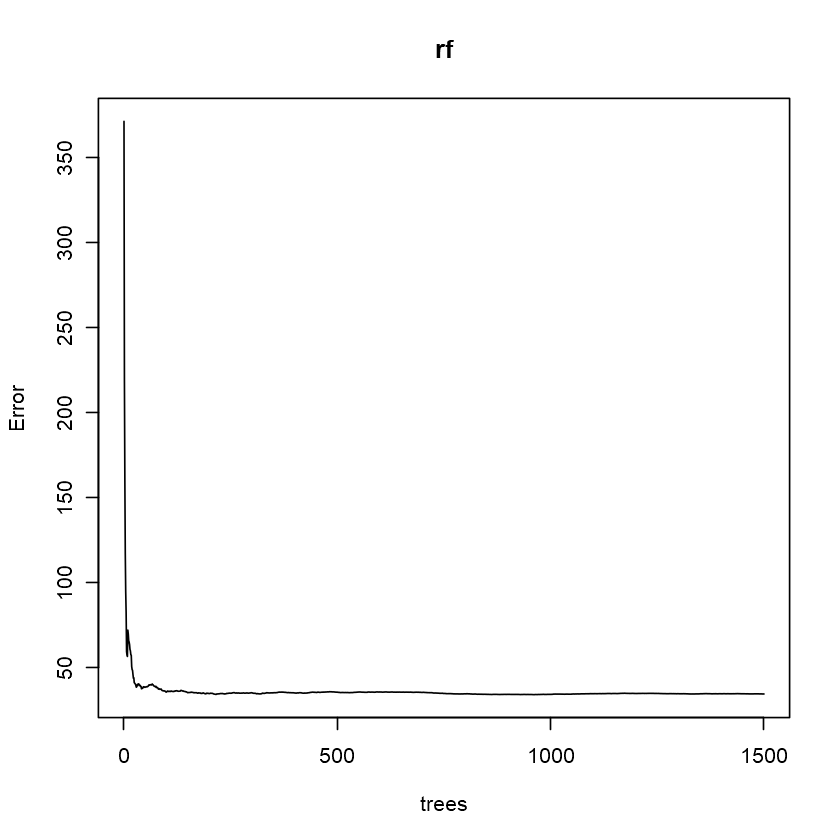

In [31]:
plot(rf)